# Lecture 12

Ci proponiamo si implementare dei modelli di Deep Neural Networks (DNNs) e Convolutional Neural Networks (CNNs) al fine di riconoscere immagini raffiguranti delle cifre da 0 a 9 scritte a mano e distinguerle.

Useremo dapprima il dataset MNIST che comprende cifre in griglie da $28\times 28$ pixel, ognuno dei quali può assumere $256$ gradazioni di colore sulla scala dei grigi. Essendoci $10$ categorie nel nostro problema, ossia le dieci cifre, possiamo dire che si tratta di un generico **problema di classificazione**. 

In [7]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [9]:
from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [10]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


## Esercizio 12.1

Iniziamo ad implementare una DNN con caratteristiche fissate (due Dense layer dotati di funzione di attivazione $relu$, un Dropout e un altro Dense, questa volta dotato di $softmax$; Loss Function: categorial crossentropy; Batch Size = $32$, $N_{epochs}=5$), avvalendoci di diversi Optimizer: 
- SGD (Stochastic Gradient Descent)
- RMSprop (Root Mean Square Propagation)
- Adam
- Adamax

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [13]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

Una volta creato il modello, propongo di seguito i grafici rispettivamente di Accuracy e Loss del modello, per set di Training e di Test. Seguono le proposte di ciascun modello per ogni cifra.

Using Optimizer:  sgd

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7603 - accuracy: 0.7759 - val_loss: 0.3201 - val_accuracy: 0.9096
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3943 - accuracy: 0.8870 - val_loss: 0.2494 - val_accuracy: 0.9291
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3182 - accuracy: 0.9099 - val_loss: 0.2068 - val_accuracy: 0.9388
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2752 - accuracy: 0.9225 - val_loss: 0.1808 - val_accuracy: 0.9483
Epoch 5/5
313/313 [==============================] - 1s 5ms/step - loss: 0.1653 - accuracy: 0.9502

Optimizer:  sgd
Test loss: 0.16525940597057343
Test accuracy: 0.9502000212669373


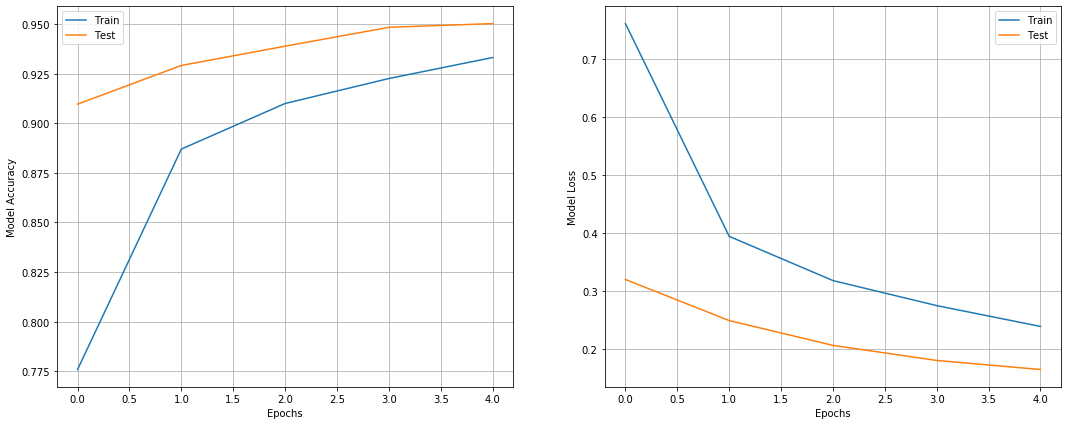

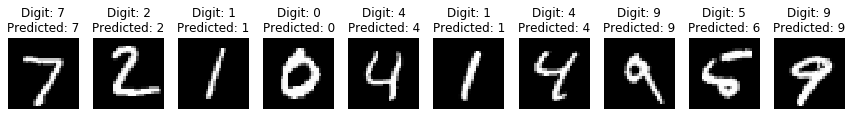

Using Optimizer:  RMSprop

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2769 - accuracy: 0.9201 - val_loss: 0.1326 - val_accuracy: 0.9663
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1557 - accuracy: 0.9624 - val_loss: 0.1353 - val_accuracy: 0.9683
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1388 - accuracy: 0.9693 - val_loss: 0.1558 - val_accuracy: 0.9705
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1453 - accuracy: 0.9706 - val_loss: 0.1407 - val_accuracy: 0.9750
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.1496 - accuracy: 0.9763

Optimizer:  RMSprop
Test loss: 0.14961619675159454
Test accuracy: 0.9763000011444092


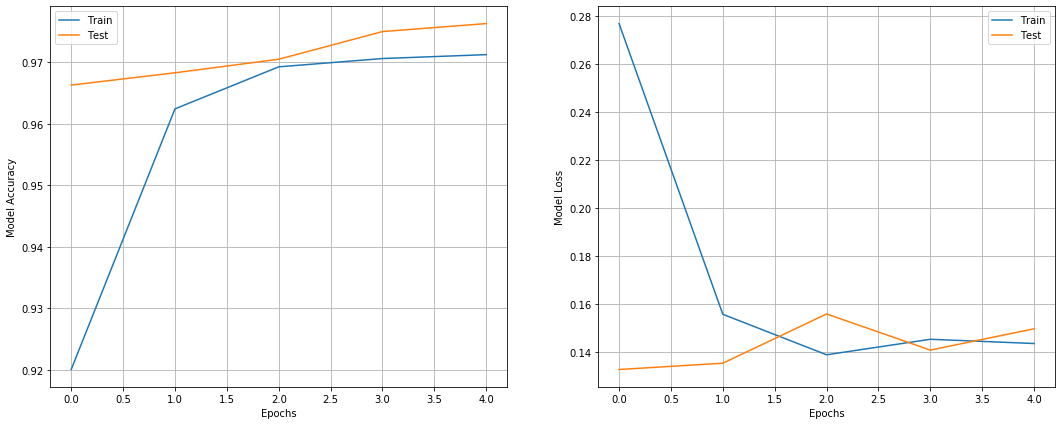

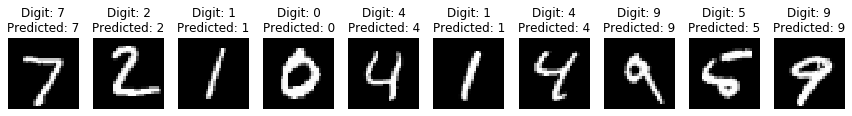

Using Optimizer:  Adam

Epoch 1/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2789 - accuracy: 0.9189 - val_loss: 0.1170 - val_accuracy: 0.9622
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1160 - accuracy: 0.9664 - val_loss: 0.0864 - val_accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0835 - accuracy: 0.9754 - val_loss: 0.0813 - val_accuracy: 0.9759
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0657 - accuracy: 0.9798 - val_loss: 0.0886 - val_accuracy: 0.9742
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0733 - accuracy: 0.9807

Optimizer:  Adam
Test loss: 0.07333475351333618
Test accuracy: 0.9807000160217285


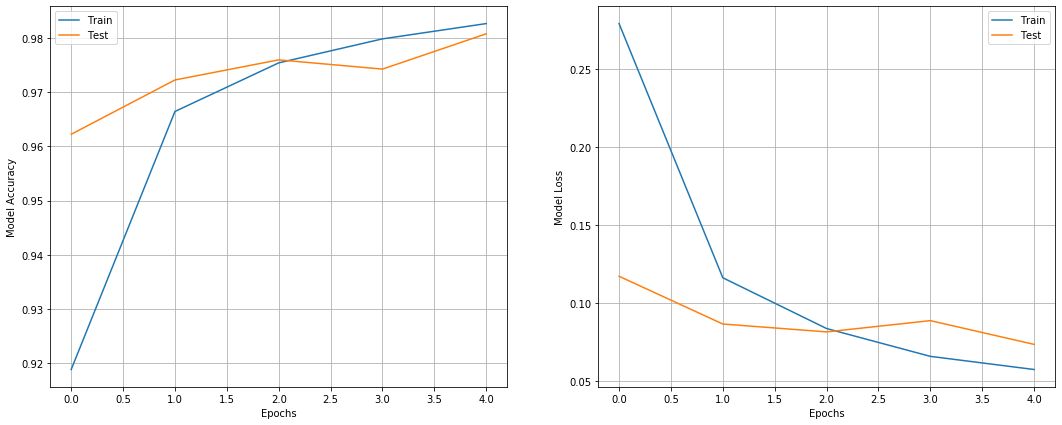

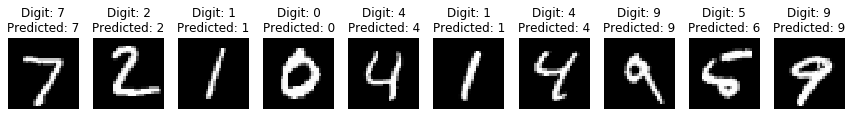

Using Optimizer:  Adamax

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4042 - accuracy: 0.8831 - val_loss: 0.1661 - val_accuracy: 0.9500
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1971 - accuracy: 0.9444 - val_loss: 0.1231 - val_accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1455 - accuracy: 0.9593 - val_loss: 0.1010 - val_accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1146 - accuracy: 0.9674 - val_loss: 0.0872 - val_accuracy: 0.9738
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0785 - accuracy: 0.9744

Optimizer:  Adamax
Test loss: 0.07848324626684189
Test accuracy: 0.974399983882904


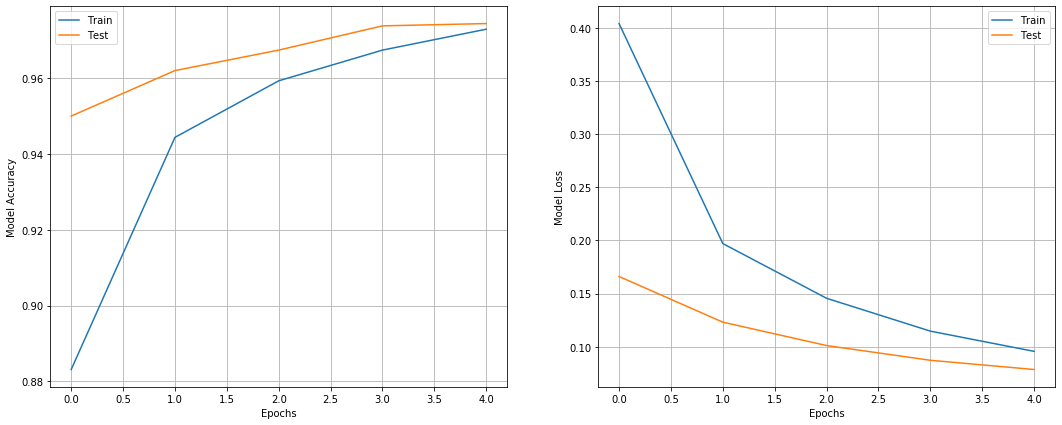

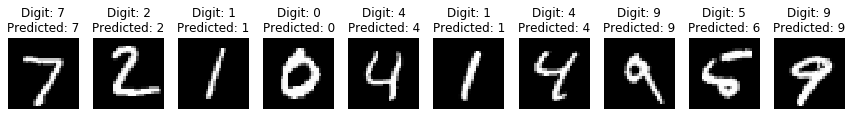

In [15]:
# training parameters
batch_size = 32
epochs = 5
Optimizer = ["sgd","RMSprop","Adam","Adamax"]

i = 1

for optimizer in Optimizer:
    
    print('Using Optimizer: ', optimizer)
    print()
    
    # create the deep neural net
    model_DNN = compile_model(optimizer)

    # train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
                            batch_size = batch_size,
                            epochs=epochs,
                            verbose = 1,
                            validation_data = (X_test, Y_test))
    
    # evaluate model
    score = model_DNN.evaluate(X_test, Y_test, verbose = 1)

    # print performance
    print()
    print('Optimizer: ', optimizer)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    # look into training history
    
    plt.figure(i, figsize = (18, 7))

    # summarize history for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('Model Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Test'], loc = 'best')
    plt.grid(True)

    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Model Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Test'], loc='best')
    plt.grid(True)
    
    plt.show()
    
    i += 1
    
    # writing digits
    predictions = model_DNN.predict(X_test)

    X_digits = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

    plt.figure(i, figsize=(15, 15)) 
    for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_digits[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off') 
    plt.show()
    
    i += 1

Vediamo innanzitutto che tra i 4 Optimizer RMSprop ha saputo riconoscere tutte le cifre scritte a mano, mentre gli altri ne hanno riconosciute 9/10 (di cui quella mancante è senz'altro la cifra scritta nel carattere più ambiguo e difficilmente riconoscibile). 

Possiamo vedere dai risultati che tutti gli Optimizier offrono un livello di Test Accuracy molto alto e assai simile tra loro (SGD: $95\%$, Adamax: $97\%$, RMSprop: $98\%$, Adam: $98\%$); Adam e Adamax presentano degli errori sul data set di Test leggermente più bassi rispetto a SGD e RMSprop.
Notiamo un trend generale che vede la Test Accuracy sempre maggiore della Training Accuracy: questo si deve al layer di Dropout che, durante la fase di Training, setta randomicamente a 0 alcune unità in input con una certa frequenza, per evitare l'Overfitting dei dati: così facendo, danneggia leggermente la Training Accuracy. Esso invece "si disattiva" durante la fase di Testing, non andando quindi ad intaccare la Test Accuracy.

## Esercizio 12.2

Per poter sfruttare l'invarianza traslazionale e migliorare il nostro modello, affrontiamo lo stesso problema di classificazione ma stavolta implementando una CNN.

In [18]:
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Creiamo il nostro modello di CNN (sempre mantenendo Loss Function: categorial crossentropy; Batch Size = $32$, $N_{epochs}=5$) in modo tale che risulti composta da:

- Layer Convoluzionale, 10 filtri 5x5 (ReLU activation)
- Max pooling, 2x2
- Layer Convoluzione, 20 filtri 3x3 (ReLU activation)
- Max pooling, 3x3
- Droupout (rate 0.25)
- Layer da 200 neuroni (ReLU activation)
- Flatten()
- Layer di Output (softmax activation)

Ho scelto come Optimizer il SGD.

In [21]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(rate=0.25)) #dropout layer with rate=0.25
    model.add(Dense(200,activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax')) #softmax layer with num_classes=10
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [22]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.8889 - accuracy: 0.7128 - val_loss: 0.1901 - val_accuracy: 0.9445
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2495 - accuracy: 0.9233 - val_loss: 0.1233 - val_accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1933 - accuracy: 0.9393 - val_loss: 0.1030 - val_accuracy: 0.9695
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1650 - accuracy: 0.9490 - val_loss: 0.0882 - val_accuracy: 0.9745
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0793 - accuracy: 0.9773

Test loss: 0.07934024930000305
Test accuracy: 0.9772999882698059


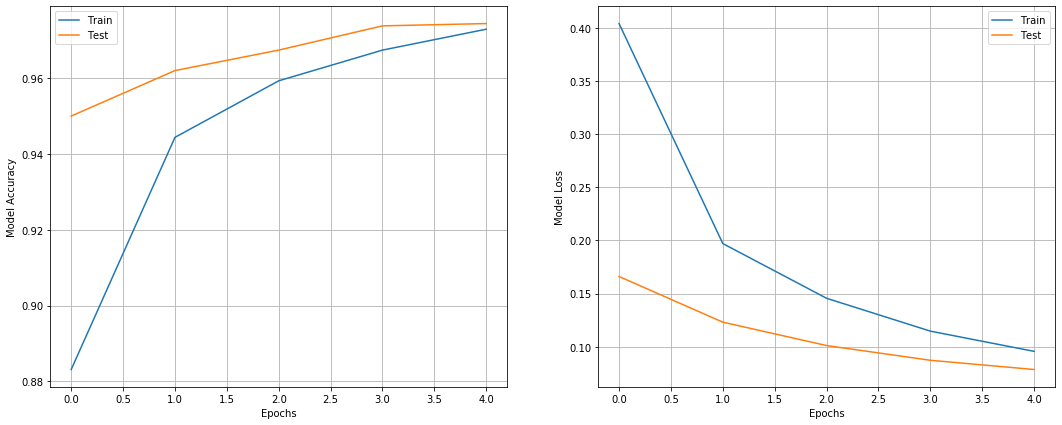

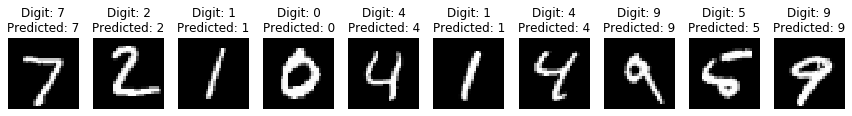

In [25]:
plt.figure(0, figsize = (18, 7))

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Model Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc = 'best')
plt.grid(True)

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Model Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
    
plt.show()
    
# writing digits
predictions = model_CNN.predict(X_test)

X_digits = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(1, figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_digits[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Come vediamo, la CNN raggiunge ottimi risultati, riuscendo a identificare tutte e 10 le cifre, con una Test Accuracy del $\approx98\%$.

## Esercizio 12.3

Vediamo ora come agisce la CNN con delle cifre scritte a mano da me: ripetiamo il test, questa volta con delle immagini diverse.

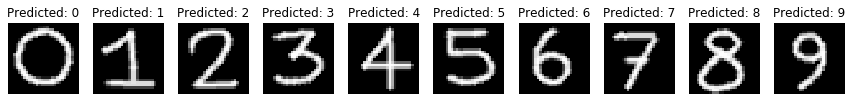

In [29]:
from PIL import Image

plt.figure(figsize=(15, 15))

for k in range(10):
    digit_filename = "./DIGITS/"+str(k)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    
    plt.subplot(1, 10, k+1)   
    plt.imshow(data, cmap='gray')
    
    data = data.reshape(1,xdim*ydim)

    if tf.keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        
    pred_0 = model_CNN.predict(data)
       
    plt.title("Predicted: {}".format(np.argmax(pred_0)))
    plt.axis('off')

plt.show()

Come vediamo, la nostra CNN è stata in grado di riconoscere ed identificare nel modo corretto anche tutte le cifre scritte da me. Ciò significa che il livello di accuratezza della rete è effettivamente buono e che essa è stata ben addestrata col il set di Training. Va anche notato che le cifre da me scritte sono pressochè standard e risultano centrate nel quadrato in input; sarebbe sicuramente più difficile per la CNN riuscire a classificare correttamente delle cifre riportate per esempio in un angolo, o distorte.